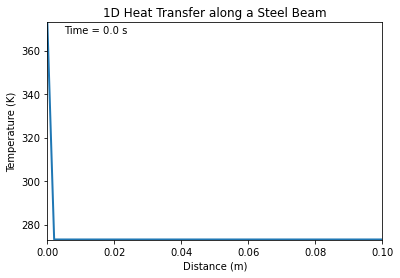

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constants
L = 0.1    # length of beam in meters
A = 0.01   # area of beam in square meters
k = 60     # thermal conductivity of steel in W/(m*K)
rho = 7850 # density of steel in kg/m^3
Cp = 480   # specific heat capacity of steel in J/(kg*K)
T0 = 373.15 # temperature at one end of the beam in Kelvin
T1 = 273.15 # temperature at the other end of the beam in Kelvin
dx = 0.002 # distance step size in meters
dt = 0.001  # time step size in seconds
t_end = 2 # end time in seconds

# Derived constants
alpha = k / (rho * Cp * A)
N = int(L/dx)
M = int(t_end/dt)

# Initial conditions
T = np.zeros((N, M))
T[:,0] = T1

# Boundary conditions
T[0,:] = T0
T[-1,:] = T1

# Heat equation solver
for i in range(0, M-1):
    for j in range(1, N-1):
        T[j,i+1] = T[j,i] + alpha * (T[j+1,i] - 2*T[j,i] + T[j-1,i]) * dt / dx**2

# Plotting function
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, L)
ax.set_ylim(273, 373)
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Temperature (K)')
ax.set_title('1D Heat Transfer along a Steel Beam')
time_text = ax.text(0.05, 0.95, '', transform=ax.transAxes)

# Animation function
def animate(i):
    line.set_data(np.linspace(0, L, N), T[:,i])
    time_text.set_text('Time = {} s'.format(round(i*dt, 3)))
    return line, time_text

# Create animation
anim = FuncAnimation(fig, animate, frames=M, interval=1, blit=True)

# Show plot
plt.show()